# DATA ACQUISTION & EXPLORATION

In [1]:
# Import Python Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# import Wrangle functions
from env import user, password, hostname, get_db_url
import acquire
import prepare

# ignore warnings
import warnings 
warnings.filterwarnings("ignore")

# import Machine Learning Library for classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

## DATA ACQUISITION

In [2]:
#Data acquisition. Functions from acquire.py to acquire the telco information
telco_df = acquire.get_telco_data('telco_churn')
telco_df.head()

,Unnamed: 0,internet_service_type_id,contract_type_id,payment_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
0,0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,Mailed check,One year,DSL
1,1,1,1,2,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Mailed check,Month-to-month,DSL
2,2,2,1,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Electronic check,Month-to-month,Fiber optic
3,3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Electronic check,Month-to-month,Fiber optic
4,4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Mailed check,Month-to-month,Fiber optic


In [3]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   payment_type_id           7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

In [4]:
#Displays rows & columns
telco_df.shape

(7043, 25)

In [5]:
#Describes the data 
telco_df.describe

<bound method NDFrame.describe of       Unnamed: 0  internet_service_type_id  contract_type_id  payment_type_id  \
0              0                         1                 2                2   
1              1                         1                 1                2   
2              2                         2                 1                1   
3              3                         2                 1                1   
4              4                         2                 1                2   
...          ...                       ...               ...              ...   
7038        7038                         1                 2                2   
7039        7039                         2                 1                1   
7040        7040                         1                 1                2   
7041        7041                         1                 3                2   
7042        7042                         1                 3               

In [6]:
#transpose the data to swap the rows and columns and displays columns as rows
telco_df.describe(include='object').T

,count,unique,top,freq
customer_id,7043,7043,0002-ORFBO,1
gender,7043,2,Male,3555
partner,7043,2,No,3641
dependents,7043,2,No,4933
phone_service,7043,2,Yes,6361
multiple_lines,7043,3,No,3390
online_security,7043,3,No,3498
online_backup,7043,3,No,3088
device_protection,7043,3,No,3095
tech_support,7043,3,No,3473


#### Initial Data Exploration Function 

In [7]:
#Function used to review the acquired TELCO data
def telco_data_explore(data):
    telco_df = data
    print(telco_df.info())
    print('                        ')
    print(telco_df.describe())
    print('                        ')
    print(telco_df.describe(include='object').T)
    print('                        ')
    print('The telco data used for this project has', telco_df.shape[0], 'rows and', telco_df.shape[1], 'columns')
    print('                        ')
    print('This is the initial exploration of data')
    return telco_df


In [8]:
# Will be used in final report
telco_data_explore(telco_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   payment_type_id           7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

,Unnamed: 0,internet_service_type_id,contract_type_id,payment_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
0,0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.60,593.3,No,Mailed check,One year,DSL
1,1,1,1,2,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.90,542.4,No,Mailed check,Month-to-month,DSL
2,2,2,1,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.90,280.85,Yes,Electronic check,Month-to-month,Fiber optic
3,3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Electronic check,Month-to-month,Fiber optic
4,4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Mailed check,Month-to-month,Fiber optic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,2,2,9987-LUTYD,Female,0,No,No,13,...,Yes,No,No,No,55.15,742.9,No,Mailed check,One year,DSL
7039,7039,2,1,1,9992-RRAMN,Male,0,Yes,No,22,...,No,No,Yes,Yes,85.10,1873.7,Yes,Electronic check,Month-to-month,Fiber optic
7040,7040,1,1,2,9992-UJOEL,Male,0,No,No,2,...,No,No,No,Yes,50.30,92.75,No,Mailed check,Month-to-month,DSL
7041,7041,1,3,2,9993-LHIEB,Male,0,Yes,Yes,67,...,Yes,No,Yes,No,67.85,4627.65,No,Mailed check,Two year,DSL


## DATA PREPARATION


In [9]:
#Dropped 'internet_service_type_id','contract_type_id' and other items that are unuseful
prepare_telco=prepare.prep_telco(telco_df)
prepare_telco


,customer_id,senior_citizen,tenure,monthly_charges,total_charges,payment_type,contract_type,partner_Yes,dependents_Yes,phone_service_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,gender_Male,contract_type,contract_type_Yes
0,0002-ORFBO,0,9,65.60,593.30,Mailed check,One year,1,1,1,...,1,0,0,1,0,0,0,0,One year,1
1,0003-MKNFE,0,9,59.90,542.40,Mailed check,Month-to-month,0,0,1,...,0,0,1,0,0,0,0,1,Month-to-month,0
2,0004-TLHLJ,0,4,73.90,280.85,Electronic check,Month-to-month,0,0,1,...,0,0,0,1,1,1,0,1,Month-to-month,0
3,0011-IGKFF,1,13,98.00,1237.85,Electronic check,Month-to-month,1,0,1,...,1,0,1,1,1,1,0,1,Month-to-month,0
4,0013-EXCHZ,1,3,83.90,267.40,Mailed check,Month-to-month,1,0,1,...,1,0,0,1,1,1,0,0,Month-to-month,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,13,55.15,742.90,Mailed check,One year,0,0,1,...,0,0,0,0,0,0,0,0,One year,1
7039,9992-RRAMN,0,22,85.10,1873.70,Electronic check,Month-to-month,1,0,1,...,0,0,1,1,1,1,0,1,Month-to-month,0
7040,9992-UJOEL,0,2,50.30,92.75,Mailed check,Month-to-month,0,0,1,...,0,0,0,1,0,0,0,1,Month-to-month,0
7041,9993-LHIEB,0,67,67.85,4627.65,Mailed check,Two year,1,1,1,...,0,0,1,0,0,0,0,1,Two year,1


In [10]:
prepare_telco.T


,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS,...,9975-SKRNR,9978-HYCIN,9979-RGMZT,9985-MWVIX,9986-BONCE,9987-LUTYD,9992-RRAMN,9992-UJOEL,9993-LHIEB,9995-HOTOH
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
tenure,9,9,4,13,3,9,71,63,7,65,...,1,47,7,1,4,13,22,2,67,63
monthly_charges,65.6,59.9,73.9,98.0,83.9,69.4,109.7,84.65,48.2,90.45,...,18.9,84.95,94.05,70.15,20.95,55.15,85.1,50.3,67.85,59.0
total_charges,593.3,542.4,280.85,1237.85,267.4,571.45,7904.25,5377.8,340.35,5957.9,...,18.9,4018.05,633.45,70.15,85.5,742.9,1873.7,92.75,4627.65,3707.6
payment_type,Mailed check,Mailed check,Electronic check,Electronic check,Mailed check,Credit card (automatic),Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,...,Mailed check,Bank transfer (automatic),Mailed check,Mailed check,Bank transfer (automatic),Mailed check,Electronic check,Mailed check,Mailed check,Electronic check
contract_type,One year,Month-to-month,Month-to-month,Month-to-month,Month-to-month,Month-to-month,Two year,Two year,Month-to-month,Two year,...,Month-to-month,One year,One year,Month-to-month,Month-to-month,One year,Month-to-month,Month-to-month,Two year,Two year
partner_Yes,1,0,0,1,1,0,1,1,0,1,...,0,1,0,0,0,0,1,0,1,1
dependents_Yes,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
phone_service_Yes,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [11]:
telco_train,telco_validate,telco_test=prepare.split_telco(prepare_telco)
telco_train

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,payment_type,contract_type,partner_Yes,dependents_Yes,phone_service_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,gender_Male,contract_type,contract_type_Yes
440,0643-OKLRP,1,47,80.35,3825.85,Electronic check,Month-to-month,1,0,1,...,0,0,0,0,1,1,0,0,Month-to-month,0
67,0112-QWPNC,0,49,84.35,4059.35,Electronic check,One year,1,0,1,...,1,0,1,0,1,0,0,1,One year,1
600,0877-SDMBN,0,54,103.95,5639.05,Bank transfer (automatic),One year,0,0,1,...,1,0,1,1,1,1,0,0,One year,1
4883,6877-TJMBR,0,1,84.80,84.80,Electronic check,Month-to-month,1,0,1,...,1,0,0,1,1,1,0,1,Month-to-month,0
1258,1862-QRWPE,0,48,20.65,1057.00,Bank transfer (automatic),Two year,1,1,1,...,0,1,0,0,0,0,1,0,Two year,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,2619-WFQWU,0,1,70.15,70.15,Mailed check,Month-to-month,0,0,1,...,0,0,0,1,1,1,0,0,Month-to-month,0
817,1194-SPVSP,0,1,19.65,19.65,Bank transfer (automatic),Month-to-month,0,0,1,...,0,1,0,0,0,0,1,1,Month-to-month,0
901,1309-BXVOQ,0,21,106.10,2249.95,Electronic check,Month-to-month,1,0,1,...,1,0,1,1,1,1,0,1,Month-to-month,0
1987,2873-ZLIWT,0,40,84.85,3303.05,Electronic check,Month-to-month,1,1,1,...,0,0,0,1,1,1,0,0,Month-to-month,0


In [12]:
telco_train.shape, telco_validate.shape, telco_test.shape

((4225, 31), (1409, 31), (1409, 31))

## EXPLORATORY ANALYSIS

In [13]:
#searching for nulls
telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 440 to 6958
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            4225 non-null   object 
 1   senior_citizen                         4225 non-null   int64  
 2   tenure                                 4225 non-null   int64  
 3   monthly_charges                        4225 non-null   float64
 4   total_charges                          4225 non-null   float64
 5   payment_type                           4225 non-null   object 
 6   contract_type                          4225 non-null   object 
 7   partner_Yes                            4225 non-null   uint8  
 8   dependents_Yes                         4225 non-null   uint8  
 9   phone_service_Yes                      4225 non-null   uint8  
 10  multiple_lines_No phone service        4225 non-null   uint8  
 11  mu

### Exploring through Visualizations

In [14]:
#Exploring churn 
telco_train.churn_Yes.value_counts()

0    3108
1    1117
Name: churn_Yes, dtype: int64

In [15]:
#Explore correlation data
telco_correlation = telco_train.corr()
telco_correlation

,senior_citizen,tenure,monthly_charges,total_charges,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,...,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,gender_Male,contract_type_Yes
senior_citizen,1.000000,-0.005635,0.208929,0.079548,0.009282,-0.213194,0.004237,-0.004237,0.131439,-0.187554,...,-0.187554,0.074819,-0.187554,0.099842,0.146231,0.158147,0.252724,-0.187554,-0.010944,-0.155135
tenure,-0.005635,1.000000,0.253464,0.829146,0.389185,0.177334,0.012473,-0.012473,0.335287,-0.054939,...,-0.054939,0.275575,-0.054939,0.283021,0.009440,-0.353568,0.016386,-0.054939,-0.010702,0.647861
monthly_charges,0.208929,0.253464,1.000000,0.650651,0.110538,-0.109119,0.247938,-0.247938,0.496073,-0.764600,...,-0.764600,0.628309,-0.764600,0.631826,0.341582,0.194626,0.784394,-0.764600,-0.009324,-0.061041
total_charges,0.079548,0.829146,0.650651,1.000000,0.328707,0.075724,0.116593,-0.116593,0.472887,-0.381767,...,-0.381767,0.508520,-0.381767,0.514751,0.153142,-0.196673,0.356210,-0.381767,-0.009415,0.443436
partner_Yes,0.009282,0.389185,0.110538,0.328707,1.000000,0.454687,0.022196,-0.022196,0.147951,-0.013932,...,-0.013932,0.126795,-0.013932,0.127231,-0.010962,-0.158451,0.011133,-0.013932,-0.010061,0.281677
dependents_Yes,-0.213194,0.177334,-0.109119,0.075724,0.454687,1.000000,-0.001979,0.001979,-0.028170,0.144610,...,0.144610,-0.009192,0.144610,-0.024724,-0.118336,-0.174038,-0.159952,0.144610,-0.001381,0.251620
phone_service_Yes,0.004237,0.012473,0.247938,0.116593,0.022196,-0.001979,1.000000,-1.000000,0.276843,0.174491,...,0.174491,-0.021546,0.174491,-0.020088,0.006630,0.013917,0.290444,0.174491,0.007051,-0.003322
multiple_lines_No phone service,-0.004237,-0.012473,-0.247938,-0.116593,-0.022196,0.001979,-1.000000,1.000000,-0.276843,-0.174491,...,-0.174491,0.021546,-0.174491,0.020088,-0.006630,-0.013917,-0.290444,-0.174491,-0.007051,0.003322
multiple_lines_Yes,0.131439,0.335287,0.496073,0.472887,0.147951,-0.028170,0.276843,-0.276843,1.000000,-0.230596,...,-0.230596,0.252771,-0.230596,0.263784,0.165686,0.054130,0.364827,-0.230596,-0.007137,0.086981
online_security_No internet service,-0.187554,-0.054939,-0.764600,-0.381767,-0.013932,0.144610,0.174491,-0.174491,-0.230596,1.000000,...,1.000000,-0.414224,1.000000,-0.420279,-0.313617,-0.231229,-0.465279,1.000000,0.008506,0.207541


In [16]:
#Explore correlation data by churn
telco_correlation_churn = telco_correlation['churn_Yes'].sort_values(ascending=False)
telco_correlation_churn

churn_Yes                                1.000000
internet_service_type_Fiber optic        0.308947
monthly_charges                          0.194626
paperless_billing_Yes                    0.177232
senior_citizen                           0.158147
streaming_movies_Yes                     0.063327
streaming_tv_Yes                         0.060962
multiple_lines_Yes                       0.054130
phone_service_Yes                        0.013917
gender_Male                              0.008575
multiple_lines_No phone service         -0.013917
device_protection_Yes                   -0.064763
online_backup_Yes                       -0.103008
partner_Yes                             -0.158451
tech_support_Yes                        -0.161989
dependents_Yes                          -0.174038
online_security_Yes                     -0.174161
total_charges                           -0.196673
internet_service_type_None              -0.231229
device_protection_No internet service   -0.231229


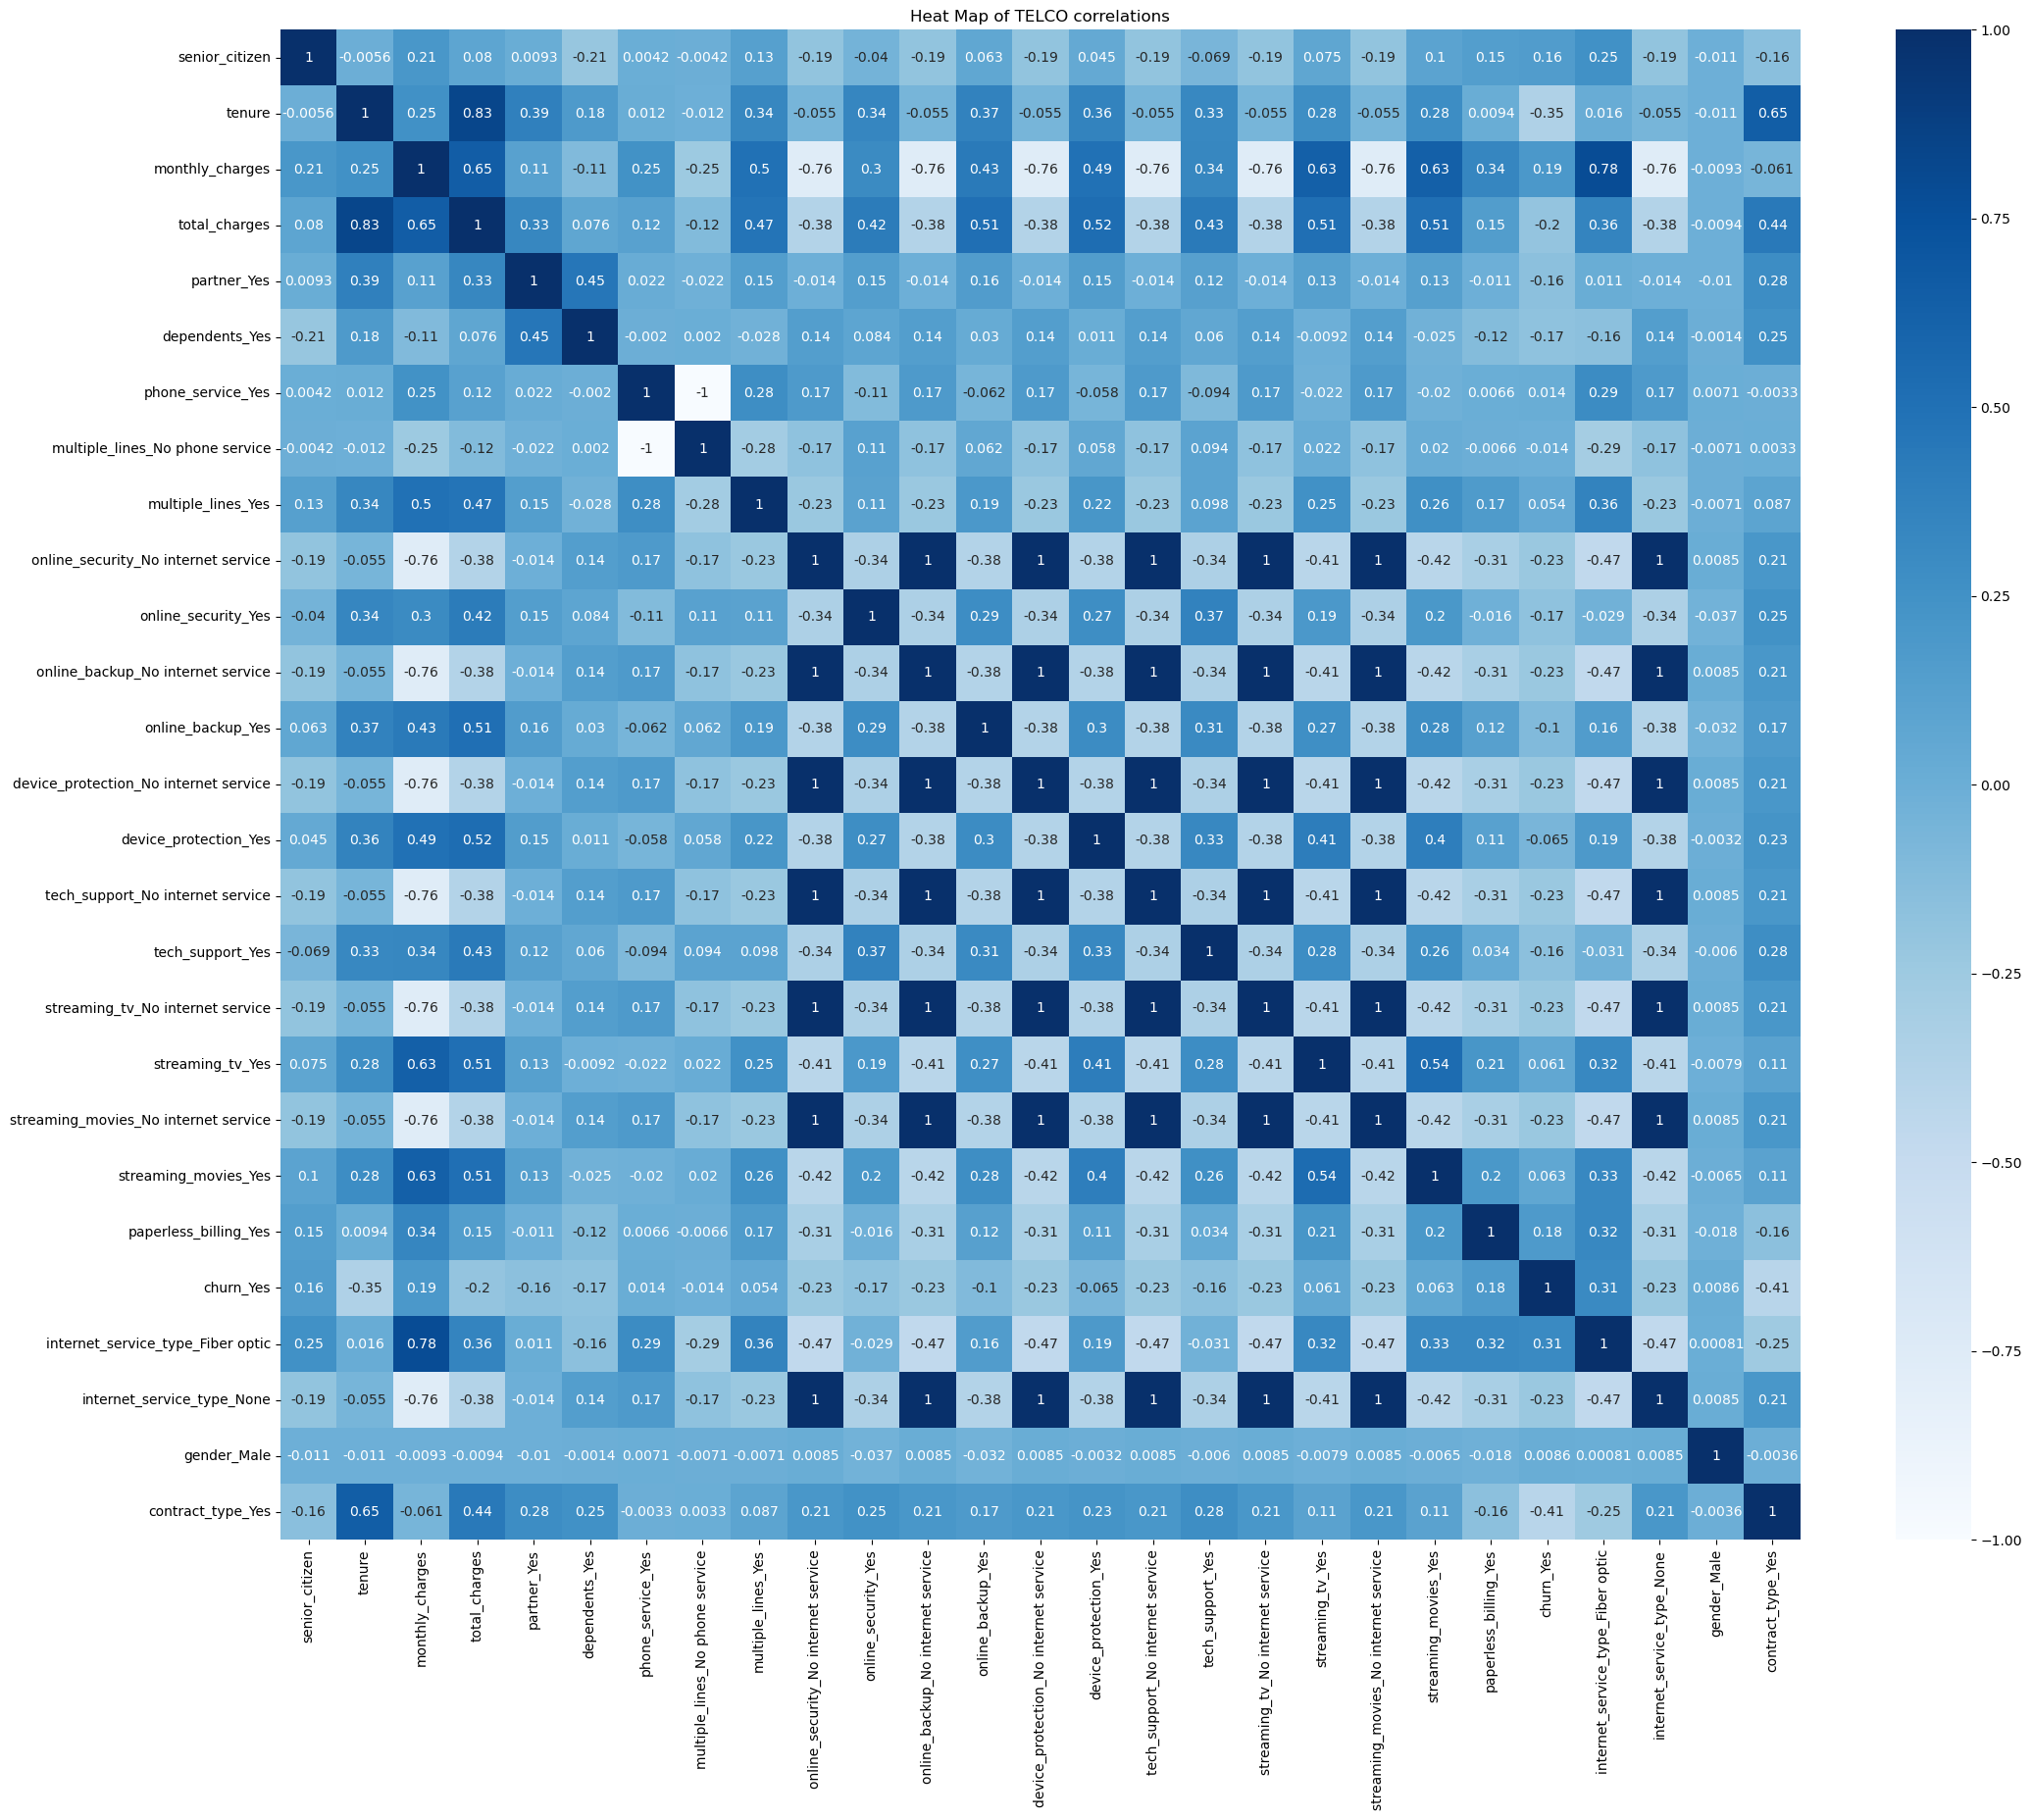

In [17]:
#Visualizing correlation data with Heat Map
plt.figure(figsize=(25,20))
sns.heatmap(telco_train.corr(), cmap='Blues', center=0, annot=True)
plt.title('Heat Map of TELCO correlations')
plt.show()

In [18]:
#Exploring contract type
telco_train.contract_type_Yes.value_counts()

0    2322
1    1903
Name: contract_type_Yes, dtype: int64

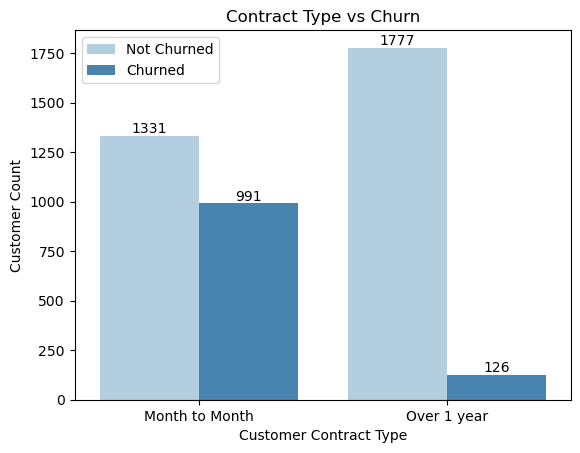

In [118]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'telco_train' with the required data
new_labels = {'not churn': 'Not Churned', 'churned': 'Churned'}
x = ['Month to Month', 'Over 1 year']

# Visualizing the streaming TV vs churn
ct = sns.countplot(data=telco_train, x='contract_type_Yes', hue='churn_Yes', palette='Blues')

# Access the legend object
legend = ct.legend()

# Modify the legend labels
legend.get_texts()[0].set_text(new_labels['not churn'])
legend.get_texts()[1].set_text(new_labels['churned'])

# Relabel the x-axis ticks
plt.xticks(range(len(x)), x)

ct.set_xlabel('Customer Contract Type')
ct.set_ylabel('Customer Count')
plt.title('Contract Type vs Churn')

plt.xticks(range(len(x)), x)

# Add count numbers on bars
for p in ct.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    offset = width * 0.02  # Adjust the offset percentage as needed
    ct.annotate(format(height, '.0f'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


#### Contract Type Visual Findings
The visual data shows that customers that the contract type has a significant impacy on the rate of churn. The longer the contract the less customers churn.

In [21]:
#Exploring the device protection feature
telco_train.device_protection_Yes.value_counts()

0    2787
1    1438
Name: device_protection_Yes, dtype: int64

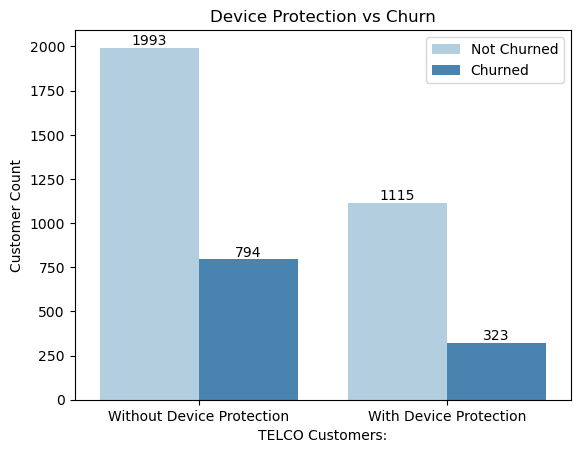

In [117]:


# Assuming you have a DataFrame 'telco_train' with the required data
new_labels = {'not churn': 'Not Churned', 'churned': 'Churned'}
x = ['Without Device Protection', 'With Device Protection']

# Visualizing the streaming TV vs churn
dp = sns.countplot(data=telco_train, x='device_protection_Yes', hue='churn_Yes', palette='Blues')

# Access the legend object
legend = dp.legend()

# Modify the legend labels
legend.get_texts()[0].set_text(new_labels['not churn'])
legend.get_texts()[1].set_text(new_labels['churned'])

plt.xticks(range(len(x)), x)

dp.set_xlabel('TELCO Customers:')
dp.set_ylabel('Customer Count')
plt.title('Device Protection vs Churn')

# Add count numbers on bars
for p in dp.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    offset = width * 0.02  # Adjust the offset percentage as needed
    dp.annotate(format(height, '.0f'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

#### Device Protection Visual Findings
The visual data shows that customers with Device Protection churn less than those that do not have Device Protection.

In [24]:
#Exploring the device protection feature
telco_train.streaming_tv_Yes.value_counts()

0    2618
1    1607
Name: streaming_tv_Yes, dtype: int64

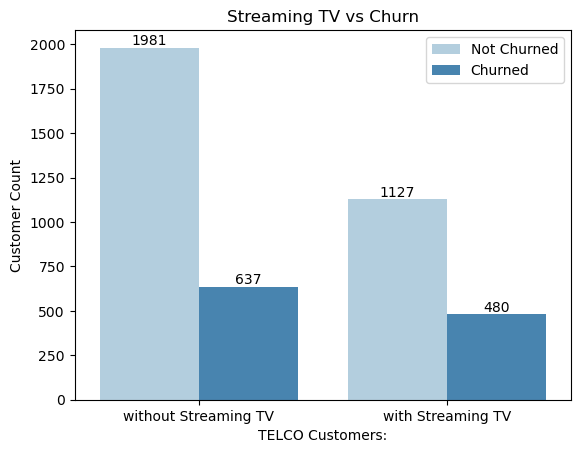

In [116]:


# Assuming you have a DataFrame 'telco_train' with the required data
new_labels = {'not churn': 'Not Churned', 'churned': 'Churned'}
x = ['without Streaming TV', 'with Streaming TV']

# Visualizing the streaming TV vs churn
st = sns.countplot(data=telco_train, x='streaming_tv_Yes', hue='churn_Yes', palette='Blues')

# Access the legend object
legend = st.legend()

# Modify the legend labels
legend.get_texts()[0].set_text(new_labels['not churn'])
legend.get_texts()[1].set_text(new_labels['churned'])

plt.xticks(range(len(x)), x)

st.set_xlabel('TELCO Customers:')
st.set_ylabel('Customer Count')
plt.title('Streaming TV vs Churn')

# Add count numbers on bars
for p in st.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    offset = width * 0.02  # Adjust the offset percentage as needed
    st.annotate(format(height, '.0f'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


#### Streaming TV Visual Findings
The visual data shows that customers that Stream Tv churn slightly less than those that do not Stream TV.

In [27]:
#Exploring the device protection feature
telco_train.tech_support_Yes.value_counts()

0    2991
1    1234
Name: tech_support_Yes, dtype: int64

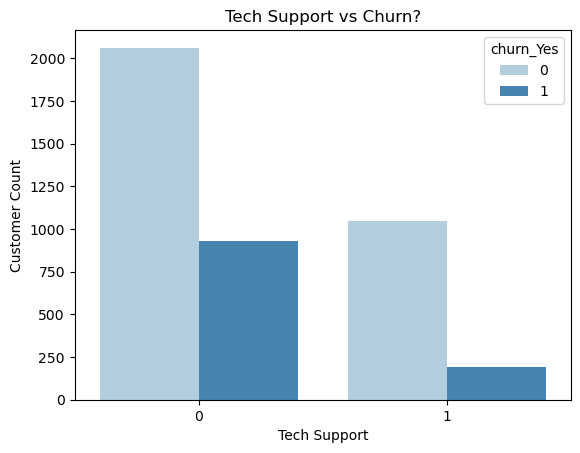

In [120]:
#Visualizing the tech support vs churn
ts=sns.countplot(data=telco_train, x='tech_support_Yes', hue='churn_Yes', palette='Blues')

ts.set_xlabel('Tech Support')
ts.set_ylabel('Customer Count')
plt.title('Tech Support vs Churn?')


plt.show()
             

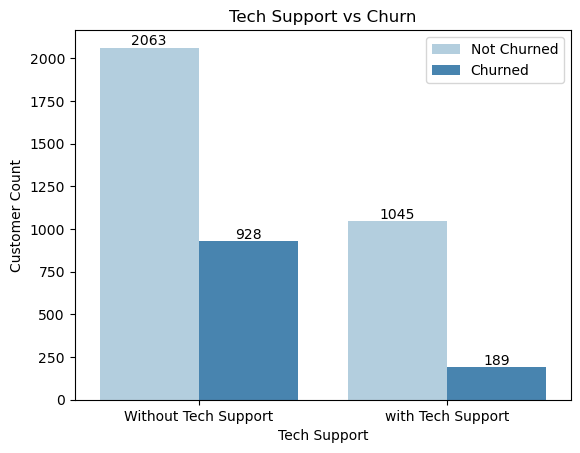

In [110]:

# Assuming you have a DataFrame 'telco_train' with the required data
new_labels = {'not churn': 'Not Churned', 'churned': 'Churned'}
x = {'with Tech Support', 'Without Tech Support'}
ts = sns.countplot(data=telco_train, x='tech_support_Yes', hue='churn_Yes', palette='Blues')

# Access the legend object
legend = ts.legend()

# Modify the legend labels
legend.get_texts()[0].set_text(new_labels['not churn'])
legend.get_texts()[1].set_text(new_labels['churned'])

plt.xticks(range(len(x)), x)


ts.set_xlabel('Tech Support')
ts.set_ylabel('Customer Count')
plt.title('Tech Support vs Churn')

# Add count numbers on bars
for p in ts.patches:
    ts.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

#### Tech Support Visual Findings
The visual data shows that customers with tech support churn significantly less than those that do not have Tech Support.

### Statistical Testing 

#### Contract Type Hypothesis:  
    • alpha = .05 
    • H0 = Contract type is independent of customer churn 
    • Ha = Contract type is dependent to customer churn  
    • Outcome: We reject the Null Hypothesis.
#####  Chi-square test using 2 discrete independent variables Contract Type vs Churn. 

In [30]:
alpha = 0.05

In [31]:
ct_observed = pd.crosstab(telco_train.contract_type_Yes, telco_train.churn_Yes)
ct_observed


churn_Yes,0,1
contract_type_Yes,,
0,1331,991
1,1777,126


In [32]:
stats.chi2_contingency(ct_observed)


Chi2ContingencyResult(statistic=697.3242831599434, pvalue=1.141715628751167e-153, dof=1, expected_freq=array([[1708.11266272,  613.88733728],
       [1399.88733728,  503.11266272]]))

In [33]:
chi2, p, degf, expected = stats.chi2_contingency(ct_observed)

In [34]:
print('Observed')
print(ct_observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')

Observed
[[1331  991]
 [1777  126]]

Expected
[[1708  613]
 [1399  503]]

----
chi^2 = 697.3243


In [35]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


Chi-square statistic: 697.3242831599434
p-value: 1.141715628751167e-153
Degrees of freedom: 1
Expected frequencies: [[1708.11266272  613.88733728]
 [1399.88733728  503.11266272]]


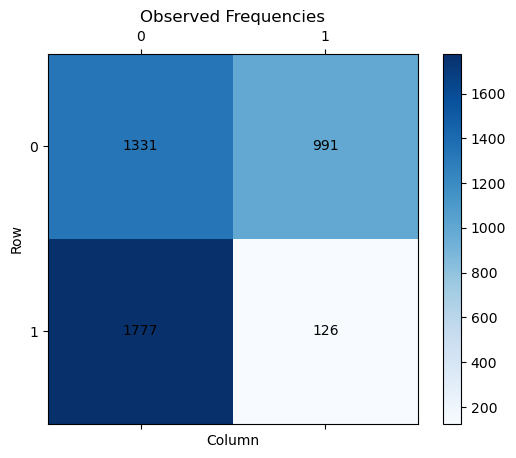

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Example contingency table
ct_observed1 = np.array([[1331, 991],
                         [1777, 126]])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(ct_observed1)

# Print chi-square statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

# Plot the observed frequencies
fig, ax = plt.subplots()
cax = ax.matshow(ct_observed1, cmap='Blues')
fig.colorbar(cax)

# Add text to each cell
for i in range(ct_observed1.shape[0]):
    for j in range(ct_observed1.shape[1]):
        ax.text(j, i, ct_observed1[i, j], va='center', ha='center')

# Set x and y axis labels
plt.xlabel('Column')
plt.ylabel('Row')

# Set plot title
plt.title('Observed Frequencies')

# Show the plot
plt.show()




#### Contract Type Statistical Findings
The statistical data corroberates with the visual data that     
• Ha = Contract Type is dependent to customer churn   

But the relationship is fair of 710 to 4225. Can be used in modeling. 

In the future test ones that show less visual signficance to see if their statistical findings matches the visual.

#### Device Protection  Hypothesis:  
    • alpha = .05 
    • H0 = Contract type is independent of customer churn 
    • Ha = Contract type is dependent to customer churn  
    • Outcome: We reject the Null Hypothesis.
#####  Chi-square test using 2 discrete independent variables Device Protection vs Churn. 

In [37]:
dp_observed = pd.crosstab(telco_train.device_protection_Yes, telco_train.churn_Yes)
dp_observed

churn_Yes,0,1
device_protection_Yes,,
0,1993,794
1,1115,323


In [38]:
stats.chi2_contingency(dp_observed)

Chi2ContingencyResult(statistic=17.412342081175986, pvalue=3.008660216314714e-05, dof=1, expected_freq=array([[2050.17656805,  736.82343195],
       [1057.82343195,  380.17656805]]))

In [39]:
chi2, p, degf, expected = stats.chi2_contingency(dp_observed)

In [40]:
print('Observed')
print(dp_observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1993  794]
 [1115  323]]

Expected
[[2050  736]
 [1057  380]]

----
chi^2 = 17.4123
p     = 0.0000


In [41]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


#### Device Protection Statistical Findings
The statistical data corroberates with the visual data that     
• Ha = Device Protection is dependent to customer churn   

But the relationship is extreamly low of 17 to 4225. This will not be used in modeling. 

#### Streaming TV Hypothesis:  
    • alpha = .05 
    • H0 = Streaming TV is independent of customer churn 
    • Ha = Streaming TV is dependent to customer churn  
    • Outcome: We reject the Null Hypothesis.
#####  Chi-square test using 2 discrete independent variables Streaming TV vs Churn. 

In [42]:
alpha = 0.05

In [43]:
st_observed = pd.crosstab(telco_train.streaming_tv_Yes, telco_train.churn_Yes)
st_observed

churn_Yes,0,1
streaming_tv_Yes,,
0,1981,637
1,1127,480


In [44]:
stats.chi2_contingency(st_observed)

Chi2ContingencyResult(statistic=15.418295807572026, pvalue=8.615014704599385e-05, dof=1, expected_freq=array([[1925.85656805,  692.14343195],
       [1182.14343195,  424.85656805]]))

In [45]:
chi2, p, degf, expected = stats.chi2_contingency(st_observed)

In [46]:
print('Observed')
print(st_observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1981  637]
 [1127  480]]

Expected
[[1925  692]
 [1182  424]]

----
chi^2 = 15.4183
p     = 0.0001


In [47]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


#### Device Protection Statistical Findings
The statistical data corroberates with the visual data that     
• Ha = Streaming TV is dependent to customer churn   

But the relationship is extreamly low of 15 to 4225. This will not be used in modeling. 

#### Tech Support Hypothesis:  
    • alpha = .05 
    • H0 = Tech support is independent of customer churn 
    • Ha = Tech support is dependent to customer churn  
    • Outcome: We reject the Null Hypothesis.
#####  Chi-square test using 2 discrete independent variables Churn and Tech Support. 

In [48]:
alpha = 0.05


In [49]:
dt_observed = pd.crosstab(telco_train.tech_support_Yes, telco_train.churn_Yes)
dt_observed


churn_Yes,0,1
tech_support_Yes,,
0,2063,928
1,1045,189


In [50]:
stats.chi2_contingency(dt_observed)


Chi2ContingencyResult(statistic=110.05925867290274, pvalue=9.510476114214062e-26, dof=1, expected_freq=array([[2200.24331361,  790.75668639],
       [ 907.75668639,  326.24331361]]))

In [51]:
chi2, p, degf, expected = stats.chi2_contingency(dt_observed)

In [52]:
print('Observed')
print(dt_observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[2063  928]
 [1045  189]]

Expected
[[2200  790]
 [ 907  326]]

----
chi^2 = 110.0593
p     = 0.0000


In [53]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


#### Tech Support Statistical Findings
The statistical data corroberates with the visual data that     
• Ha = Tech support is dependent to customer churn   

But the relationship is weak of 110 to 4225. Can be used in modeling. 

Chi-square statistic: 110.05925867290274
p-value: 9.510476114214062e-26
Degrees of freedom: 1
Expected frequencies: [[2200.24331361  790.75668639]
 [ 907.75668639  326.24331361]]


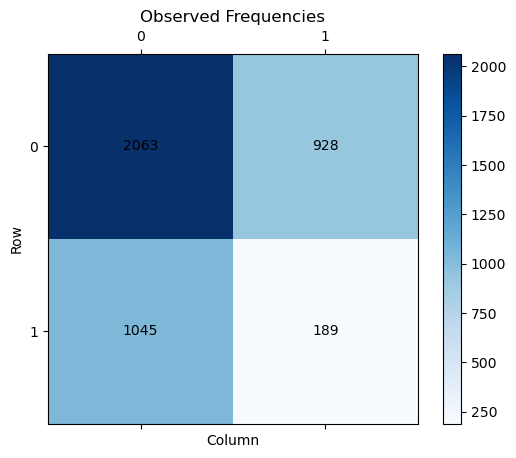

In [54]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Example contingency table
dt_observed1 = np.array([[2063, 928],
                         [1045, 189]])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(dt_observed1)

# Print chi-square statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

# Plot the observed frequencies
fig, ax = plt.subplots()
cax = ax.matshow(dt_observed1, cmap='Blues')
fig.colorbar(cax)

# Add text to each cell
for i in range(dt_observed1.shape[0]):
    for j in range(dt_observed1.shape[1]):
        ax.text(j, i, dt_observed1[i, j], va='center', ha='center')

# Set x and y axis labels
plt.xlabel('Column')
plt.ylabel('Row')

# Set plot title
plt.title('Observed Frequencies')

# Show the plot
plt.show()



### SUMMARY 

## MODELING
Using the Tech Support and Contract Type for modeling. Establishing a baseline 74%.  Will use Random Forest, Decision Tree, Logistic  with a Random Seed = 42

In [55]:
#Splitting the data in to X and Y to take out the data with curn and those without 
telco_X_train = telco_train.select_dtypes(exclude=['object']).drop(columns=['churn_Yes'])
telco_y_train = telco_train.select_dtypes(exclude=['object']).churn_Yes

telco_X_validate = telco_validate.select_dtypes(exclude=['object']).drop(columns=['churn_Yes'])
telco_y_validate = telco_validate.select_dtypes(exclude=['object']).churn_Yes

telco_X_test = telco_test.select_dtypes(exclude=['object']).drop(columns=['churn_Yes'])
telco_y_test = telco_test.select_dtypes(exclude=['object']).churn_Yes

In [56]:
telco_train.head

<bound method NDFrame.head of      customer_id  senior_citizen  tenure  monthly_charges  total_charges  \
440   0643-OKLRP               1      47            80.35        3825.85   
67    0112-QWPNC               0      49            84.35        4059.35   
600   0877-SDMBN               0      54           103.95        5639.05   
4883  6877-TJMBR               0       1            84.80          84.80   
1258  1862-QRWPE               0      48            20.65        1057.00   
...          ...             ...     ...              ...            ...   
1794  2619-WFQWU               0       1            70.15          70.15   
817   1194-SPVSP               0       1            19.65          19.65   
901   1309-BXVOQ               0      21           106.10        2249.95   
1987  2873-ZLIWT               0      40            84.85        3303.05   
6958  9867-XOBQA               0      21            53.15        1183.20   

                   payment_type   contract_type  partner_

### Evaluate on Baseline (Validate)

In [57]:
(telco_y_train==0).mean()

0.735621301775148

### Evaluate on Train

#### Decision Tree

##### MAKE Decision Tree

In [58]:
clf_telco_tree = DecisionTreeClassifier(max_depth=3, random_state=42)

##### FIT Decision Tree

In [59]:

clf_telco_tree = clf_telco_tree.fit(telco_X_train, telco_y_train)

[Text(0.5, 0.875, 'contract_type_Yes <= 0.5\ngini = 0.389\nsamples = 4225\nvalue = [3108, 1117]'),
 Text(0.25, 0.625, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.489\nsamples = 2322\nvalue = [1331, 991]'),
 Text(0.125, 0.375, 'tenure <= 5.5\ngini = 0.408\nsamples = 1047\nvalue = [748, 299]'),
 Text(0.0625, 0.125, 'gini = 0.489\nsamples = 450\nvalue = [259, 191]'),
 Text(0.1875, 0.125, 'gini = 0.296\nsamples = 597\nvalue = [489, 108]'),
 Text(0.375, 0.375, 'tenure <= 14.5\ngini = 0.496\nsamples = 1275\nvalue = [583, 692]'),
 Text(0.3125, 0.125, 'gini = 0.434\nsamples = 596\nvalue = [190, 406]'),
 Text(0.4375, 0.125, 'gini = 0.488\nsamples = 679\nvalue = [393, 286]'),
 Text(0.75, 0.625, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.124\nsamples = 1903\nvalue = [1777, 126]'),
 Text(0.625, 0.375, 'monthly_charges <= 41.375\ngini = 0.065\nsamples = 1334\nvalue = [1289, 45]'),
 Text(0.5625, 0.125, 'gini = 0.018\nsamples = 658\nvalue = [652, 6]'),
 Text(0.6875, 0.125, 'gini = 0.

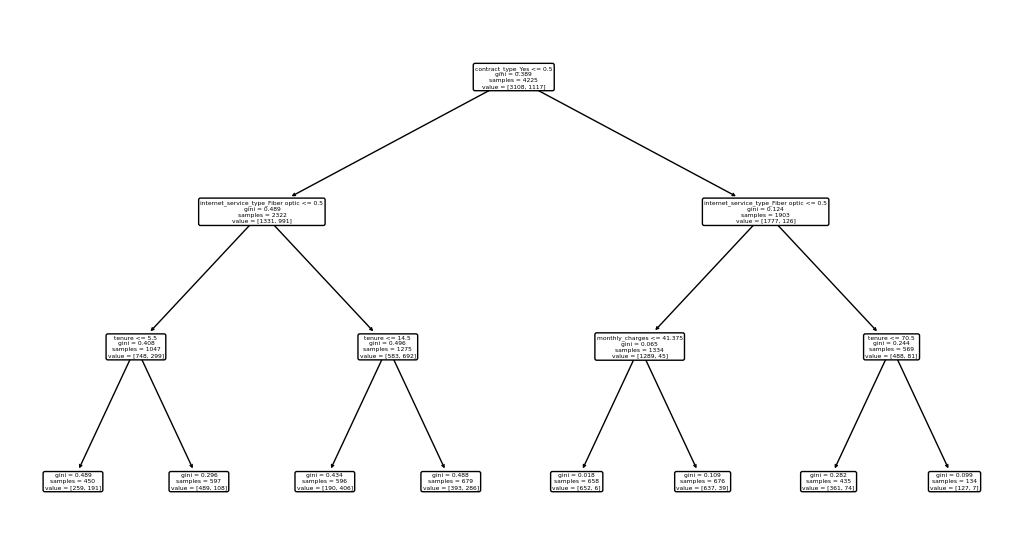

In [60]:
plt.figure(figsize=(13, 7))
plot_tree(clf_telco_tree, feature_names=telco_X_train.columns, rounded=True)

##### USE Decision Tree

In [61]:
#Dataframe of predictions
telco_y_prediction = pd.DataFrame({'churn': telco_y_train,'baseline': 0, 'model_1':clf_telco_tree.predict(telco_X_train)})
telco_y_prediction

,churn,baseline,model_1
440,1,0,0
67,1,0,0
600,1,0,0
4883,1,0,1
1258,0,0,0
...,...,...,...
1794,1,0,1
817,0,0,0
901,1,0,0
1987,1,0,0


In [62]:
y_prediction_prob = clf_telco_tree.predict_proba(telco_X_train)
print(y_prediction_prob[0:5])


[[0.57879234 0.42120766]
 [0.94230769 0.05769231]
 [0.82988506 0.17011494]
 [0.31879195 0.68120805]
 [0.99088146 0.00911854]]


In [63]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf_telco_tree.score(telco_X_train, telco_y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [64]:
confusion_matrix(telco_y_prediction.churn, telco_y_prediction.model_1)

array([[2918,  190],
       [ 711,  406]])

In [65]:
print(classification_report(telco_y_prediction.churn,telco_y_prediction.model_1))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      3108
           1       0.68      0.36      0.47      1117

    accuracy                           0.79      4225
   macro avg       0.74      0.65      0.67      4225
weighted avg       0.77      0.79      0.76      4225



Decision Tree Model is slightly higher than baseline average in sample data. This model can be used on validation.

### LOGISTIC REGRESSION

##### MAKE Logistic Regression

In [66]:
# Define the logistic regression model
logit = LogisticRegression(C=1, random_state=42)

##### FIT Logistic Regression

In [67]:
#  fit the model on train data
logit.fit(telco_X_train, telco_y_train)

LogisticRegression(C=1, random_state=42)

##### USE Logistic Regression

In [68]:
# now use the model to make predictions
y_prediction = logit.predict(telco_X_train)
y_prediction

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [69]:
#Dataframe of predictions
telco_y_prediction.head()

,churn,baseline,model_1
440,1,0,0
67,1,0,0
600,1,0,0
4883,1,0,1
1258,0,0,0


In [70]:
telco_y_prediction['model_2'] = y_prediction

In [71]:
print('Accuracy of Logistic Regression training set: {:.2f}'
      .format(logit.score(telco_X_train, telco_y_train)))

Accuracy of Logistic Regression training set: 0.80


In [72]:
confusion_matrix(telco_y_prediction.churn, telco_y_prediction.model_2)

array([[2783,  325],
       [ 508,  609]])

In [73]:
print(classification_report(telco_y_prediction.churn,telco_y_prediction.model_2))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3108
           1       0.65      0.55      0.59      1117

    accuracy                           0.80      4225
   macro avg       0.75      0.72      0.73      4225
weighted avg       0.79      0.80      0.80      4225



#### RANDOM FOREST

##### MAKE Random Forest

In [74]:

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=42)


##### FIT Random Forest

In [75]:
#building our model on our train values
rf.fit(telco_X_train, telco_y_train)

RandomForestClassifier(max_depth=10, random_state=42)

##### USE Random Forest

In [76]:
#score on my train data
rf.score(telco_X_train,telco_y_train)

0.8949112426035503

In [77]:
# now use the model to make predictions
rf_y_prediction = rf.predict(telco_X_train)
rf_y_prediction

array([1, 0, 0, ..., 1, 1, 0], dtype=uint8)

In [78]:
telco_y_prediction['model_3'] =rf_y_prediction

In [79]:
#Dataframe of predictions
telco_y_prediction.head()

,churn,baseline,model_1,model_2,model_3
440,1,0,0,0,1
67,1,0,0,0,0
600,1,0,0,0,0
4883,1,0,1,1,1
1258,0,0,0,0,0


In [80]:
print('Accuracy of Logistic Regression training set: {:.2f}'
      .format(rf.score(telco_X_train, telco_y_train)))

Accuracy of Logistic Regression training set: 0.89


In [81]:
confusion_matrix(telco_y_prediction.churn, telco_y_prediction.model_3)

array([[2961,  147],
       [ 297,  820]])

In [82]:
print(classification_report(telco_y_prediction.churn,telco_y_prediction.model_3))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3108
           1       0.85      0.73      0.79      1117

    accuracy                           0.89      4225
   macro avg       0.88      0.84      0.86      4225
weighted avg       0.89      0.89      0.89      4225



### Evaluate on Validate

In [83]:
telco_validate.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,payment_type,contract_type,partner_Yes,dependents_Yes,phone_service_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,gender_Male,contract_type,contract_type_Yes
5854,8229-BUJHX,0,71,20.50,1500.95,Bank transfer (automatic),Two year,1,1,1,...,0,1,0,0,0,0,1,0,Two year,1
797,1163-VIPRI,0,65,109.30,7337.55,Electronic check,Two year,1,1,1,...,1,0,1,0,0,1,0,0,Two year,1
3188,4568-KNYWR,0,52,63.25,3342.45,Credit card (automatic),Two year,0,0,1,...,1,0,0,1,0,0,0,1,Two year,1
2254,3221-CJMSG,0,24,51.10,1269.60,Credit card (automatic),Month-to-month,0,0,1,...,0,0,0,1,0,0,0,1,Month-to-month,0
5732,8066-POXGX,0,13,35.10,446.10,Electronic check,Month-to-month,0,0,0,...,0,0,1,1,1,0,0,0,Month-to-month,0


##### USE Decision Tree (Validate)

In [84]:
#Dataframe of predictions
telco_y_val_prediction = pd.DataFrame({'churn': telco_y_validate,'baseline': 0, 'model_1':clf_telco_tree.predict(telco_X_validate)})
telco_y_val_prediction

,churn,baseline,model_1
5854,0,0,0
797,0,0,0
3188,0,0,0
2254,0,0,0
5732,1,0,0
...,...,...,...
1045,1,0,1
4365,0,0,0
5649,0,0,0
5198,0,0,1


In [85]:
y_val_prediction_prob = clf_telco_tree.predict_proba(telco_X_validate)
print(y_val_prediction_prob[0:5])

[[0.99088146 0.00911854]
 [0.82988506 0.17011494]
 [0.94230769 0.05769231]
 [0.81909548 0.18090452]
 [0.81909548 0.18090452]]


In [86]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf_telco_tree.score(telco_X_validate, telco_y_validate)))

Accuracy of Decision Tree classifier on training set: 0.80


In [87]:
confusion_matrix(telco_y_val_prediction.churn, telco_y_val_prediction.model_1)

array([[984,  50],
       [227, 148]])

In [88]:
print(classification_report(telco_y_val_prediction.churn,telco_y_val_prediction.model_1))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      1034
           1       0.75      0.39      0.52       375

    accuracy                           0.80      1409
   macro avg       0.78      0.67      0.70      1409
weighted avg       0.80      0.80      0.78      1409



Decision Tree Model is  higher than baseline average in sample data. This model can be used on validation.

### LOGISTIC REGRESSION

##### USE Logistic Regression

In [89]:
# now use the model to make predictions
val_y_prediction = logit.predict(telco_X_validate)
val_y_prediction

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [90]:
#Dataframe of predictions
telco_y_val_prediction.head()

,churn,baseline,model_1
5854,0,0,0
797,0,0,0
3188,0,0,0
2254,0,0,0
5732,1,0,0


In [91]:
telco_y_val_prediction['model_2'] = val_y_prediction

In [92]:
print('Accuracy of Logistic Regression training set: {:.2f}'
      .format(logit.score(telco_X_validate, telco_y_validate)))

Accuracy of Logistic Regression training set: 0.80


In [93]:
confusion_matrix(telco_y_val_prediction.churn, telco_y_val_prediction.model_2)

array([[930, 104],
       [173, 202]])

In [94]:
print(classification_report(telco_y_val_prediction.churn,telco_y_val_prediction.model_2))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1034
           1       0.66      0.54      0.59       375

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



#### RANDOM FOREST

##### USE Random Forest

In [95]:
#score on my train data
rf.score(telco_X_validate,telco_y_validate)

0.794889992902768

In [96]:
# now use the model to make predictions
val_rf_y_prediction = rf.predict(telco_X_validate)
val_rf_y_prediction

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [97]:
telco_y_val_prediction['model_3'] =val_rf_y_prediction

In [98]:
#Dataframe of predictions
telco_y_val_prediction.head()

,churn,baseline,model_1,model_2,model_3
5854,0,0,0,0,0
797,0,0,0,0,0
3188,0,0,0,0,0
2254,0,0,0,0,0
5732,1,0,0,0,0


In [99]:
print('Accuracy of Logistic Regression training set: {:.2f}'
      .format(rf.score(telco_X_validate, telco_y_validate)))

Accuracy of Logistic Regression training set: 0.79


In [100]:
confusion_matrix(telco_y_val_prediction.churn, telco_y_val_prediction.model_3)

array([[927, 107],
       [182, 193]])

In [101]:
print(classification_report(telco_y_val_prediction.churn,telco_y_val_prediction.model_3))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1034
           1       0.64      0.51      0.57       375

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



### SELECTED EVALUATION METHOD: Logistic Regression because it is the most consistant Model of 80% and beat the baseline of 74%

### Evaluate on Test

### LOGISTIC REGRESSION

##### USE Logistic Regression

In [102]:
# now use the model to make predictions
test_y_prediction = logit.predict(telco_X_test)
test_y_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [103]:
logit.classes_

array([0, 1], dtype=uint8)

In [104]:
y_pred_prob= logit.predict_proba(telco_X_test) [:,1]

In [105]:
telco_y_test_prediction = pd.DataFrame({
    'customer_id': telco_test['customer_id'],
    'Probability of churn': logit.predict_proba(telco_X_test) [:,1],
    'Test Prediction': logit.predict(telco_X_test)
})
telco_y_test_prediction


,customer_id,Probability of churn,Test Prediction
941,1360-RCYRT,0.162824,0
1404,2075-PUEPR,0.003910,0
5515,7766-CLTIC,0.370094,0
3684,5196-SGOAK,0.629670,1
7017,9957-YODKZ,0.751717,1
...,...,...,...
2464,3524-WQDSG,0.425426,0
5585,7861-UVUFT,0.558280,1
804,1172-VIYBP,0.030980,0
3190,4570-QHXHL,0.446220,0


In [106]:
print('Accuracy of Logistic Regression training set: {:.2f}'
      .format(logit.score(telco_X_test, telco_y_test)))

Accuracy of Logistic Regression training set: 0.80


In [107]:
print(classification_report(telco_y_test,test_y_prediction))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1032
           1       0.66      0.57      0.61       377

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



#### CREATE PREDICTION.CSV

In [108]:
telco_y_test_prediction.to_csv('Predictions.csv',index =False)




<span style="color:blue">Testing on code markdown color</span> 
